<a href="https://colab.research.google.com/github/shumshersubashgautam/Yolo_Classification_Autism-/blob/main/Yolov5_Yolov8_Autism_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Mar 11 11:07:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/MyDrive/autism.zip /content/

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
%cd {HOME}
!yolo task=classify mode=predict model=yolov8n-cls.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 5.28M/5.28M [00:00<00:00, 12.3MB/s]
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs

100% 104k/104k [00:00<00:00, 64.1MB/s]
100% 755k/755k [00:00<00:00, 102MB/s]
image 1/1 /content/dog.jpeg: 224x224 beagle 0.40, basset 0.40, Walker_hound 0.08, English_foxhound 0.03, bloodhound 0.02, 3.8ms
Speed: 0.3ms preprocess, 3.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [11]:
model = YOLO(f'{HOME}/yolov8n-cls.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 224x224 beagle 0.40, basset 0.40, Walker_hound 0.08, English_foxhound 0.03, bloodhound 0.02, 3.9ms
Speed: 0.4ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [12]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data=/content/autism epochs=10 imgsz=128

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/autism, epochs=10, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, sim

In [13]:
!ls -la {HOME}/runs/classify/train/

total 100
drwxr-xr-x 3 root root  4096 Mar 11 11:12 .
drwxr-xr-x 3 root root  4096 Mar 11 11:11 ..
-rw-r--r-- 1 root root  1362 Mar 11 11:11 args.yaml
-rw-r--r-- 1 root root 81360 Mar 11 11:14 events.out.tfevents.1678533103.6d8d2f9b4a78.1847.0
-rw-r--r-- 1 root root  2112 Mar 11 11:14 results.csv
drwxr-xr-x 2 root root  4096 Mar 11 11:12 weights


In [14]:
!cat {HOME}/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      0,                 0.1726,                0.55714,                      1,                0.60229,               0.070181,              0.0033133,              0.0033133
                      1,                0.16914,                0.69643,                      1,                0.55012,               0.039523,              0.0059886,              0.0059886
                      2,                0.16571,                0.77857,                      1,                0.51658,              0.0082047,              0.0080039,              0.0080039
                      3,                0.16206,                0.68571,                      1,                 0.5458,                0.00703,                0.00703,                0.00703
                      4,                

In [21]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data=/content/autism

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)
               classes   top1_acc   top5_acc: 100% 18/18 [00:01<00:00, 13.04it/s]
                   all      0.732          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [34]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source=./autism/test/Autistic/

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/autism/test/Autistic/001.jpg: 128x128 Autistic 0.78, Non_Autistic 0.22, 4.3ms
image 2/140 /content/autism/test/Autistic/002.jpg: 128x128 Autistic 0.82, Non_Autistic 0.18, 13.3ms
image 3/140 /content/autism/test/Autistic/003.jpg: 128x128 Autistic 0.74, Non_Autistic 0.26, 4.3ms
image 4/140 /content/autism/test/Autistic/004.jpg: 128x128 Autistic 0.59, Non_Autistic 0.41, 5.8ms
image 5/140 /content/autism/test/Autistic/005.jpg: 128x128 Autistic 0.75, Non_Autistic 0.25, 4.6ms
image 6/140 /content/autism/test/Autistic/006.jpg: 128x128 Autistic 0.81, Non_Autistic 0.19, 4.4ms
image 7/140 /content/autism/test/Autistic/007.jpg: 128x128 Autistic 0.76, Non_Autistic 0.24, 4.3ms
image 8/140 /content/autism/test/Autistic/008.jpg: 128x128 Autistic 0.53, Non_Autistic 0.47, 4.3ms
image 9/140 /content/autis

In [28]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source=./autism/test/Non_Autistic/

/content
Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/140 /content/autism/test/Non_Autistic/001.jpg: 128x128 Non_Autistic 0.61, Autistic 0.39, 4.3ms
image 2/140 /content/autism/test/Non_Autistic/002.jpg: 128x128 Non_Autistic 0.93, Autistic 0.07, 4.8ms
image 3/140 /content/autism/test/Non_Autistic/003.jpg: 128x128 Non_Autistic 0.91, Autistic 0.09, 4.0ms
image 4/140 /content/autism/test/Non_Autistic/004.jpg: 128x128 Non_Autistic 0.87, Autistic 0.13, 2.9ms
image 5/140 /content/autism/test/Non_Autistic/005.jpg: 128x128 Non_Autistic 0.89, Autistic 0.11, 3.5ms
image 6/140 /content/autism/test/Non_Autistic/006.jpg: 128x128 Non_Autistic 0.96, Autistic 0.04, 3.1ms
image 7/140 /content/autism/test/Non_Autistic/007.jpg: 128x128 Non_Autistic 0.58, Autistic 0.42, 3.1ms
image 8/140 /content/autism/test/Non_Autistic/008.jpg: 128x128 Non_Autistic 0.83, Autistic 0.17, 3

# **Real Autism found in Tiktok It predicts well on testing this data!! **

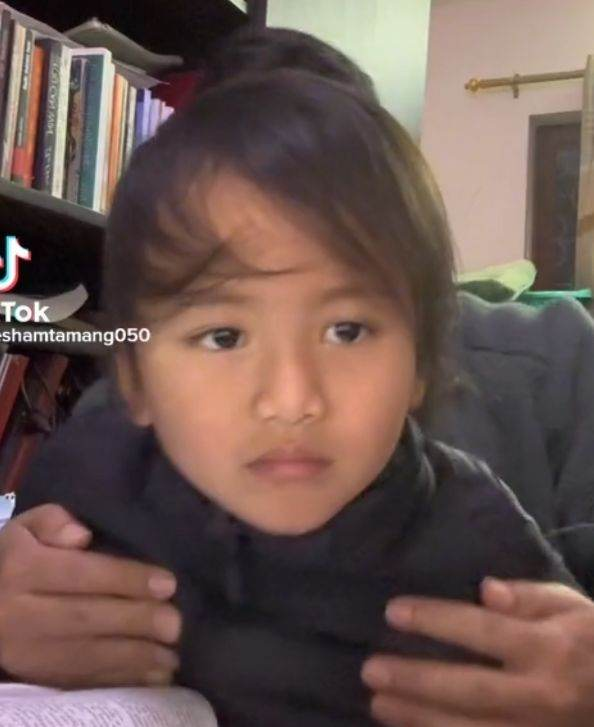

In [35]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/autismpatient.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [29]:
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source=./autismpatient.jpg

Ultralytics YOLOv8.0.52 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs

image 1/1 /content/autismpatient.jpg: 128x128 Autistic 0.78, Non_Autistic 0.22, 4.1ms
Speed: 0.2ms preprocess, 4.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


In [36]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-119-g5543b89 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.7/78.2 GB disk)


In [37]:
!git clone https://github.com/DarvinX/trash_classifier.git

Cloning into 'trash_classifier'...
remote: Enumerating objects: 2574, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2574 (delta 0), reused 0 (delta 0), pack-reused 2571
Receiving objects: 100% (2574/2574), 43.30 MiB | 17.21 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [38]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

  0%|          | 0.00/4.87M [00:00<?, ?B/s]

  0%|          | 0.00/10.5M [00:00<?, ?B/s]

  0%|          | 0.00/24.9M [00:00<?, ?B/s]

  0%|          | 0.00/50.9M [00:00<?, ?B/s]

  0%|          | 0.00/92.0M [00:00<?, ?B/s]

In [39]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

In [41]:
%cd ../yolov5

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')
!python classify/train.py --model yolov5n-cls.pt --data trash_classifier/dataset --epochs 10 --img 224 --pretrained weights/yolov5s-cls.pt

/content/yolov5
classify/train: model=yolov5n-cls.pt, data=trash_classifier/dataset, epochs=10, batch_size=64, imgsz=224, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-119-g5543b89 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
2023-03-11 11:52:26.013619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 11:52:27.353852: W ten

In [42]:
#Download example image
import requests
image_url = "https://i.imgur.com/OczPfaz.jpg"
img_data = requests.get(image_url).content
with open('bananas.jpg', 'wb') as handler:
    handler.write(img_data)